<h1>Tratamento de dados para a equipe de machine learning</h1>

In [60]:
import pandas as pd
from pandas.core.arrays.datetimelike import dtype_to_unit

url = 'dataset-telecon.json'

In [61]:
dados = pd.read_json(url)
dados.head()

,id_cliente,Churn,cliente,telefone,internet,conta
0,0002-ORFBO,nao,"{'genero': 'feminino', 'idoso': 0, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': None, 'faturamente_eletronico': N..."
1,0003-MKNFE,nao,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'DSL', 'seguranca_online'...","{'contrato': 'mes a mes', 'faturamente_eletron..."
2,0004-TLHLJ,sim,"{'genero': 'masculino', 'idoso': 0, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
3,0011-IGKFF,sim,"{'genero': 'masculino', 'idoso': 1, 'parceiro'...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."
4,0013-EXCHZ,sim,"{'genero': 'feminino', 'idoso': 1, 'parceiro':...","{'servico_telefone': 'sim', 'varias_linhas': '...","{'servico_internet': 'fibra otica', 'seguranca...","{'contrato': 'mes a mes', 'faturamente_eletron..."


In [62]:
dados['conta'][0]

{'contrato': None,
 'faturamente_eletronico': None,
 'metodo_pagamento': None,
 'cobranca': {'mensal': None, 'Total': None}}

In [63]:
pd.json_normalize(dados['conta']).head()

,contrato,faturamente_eletronico,metodo_pagamento,cobranca.mensal,cobranca.Total
0,None,None,None,NaN,None
1,mes a mes,nao,cheque pelo correio,59.9,542.4
2,mes a mes,sim,cheque eletronico,73.9,280.85
3,mes a mes,sim,cheque eletronico,98.0,1237.85
4,mes a mes,sim,cheque pelo correio,83.9,267.4


In [64]:
pd.json_normalize(dados['telefone']).head()

,servico_telefone,varias_linhas
0,sim,nao
1,sim,sim
2,sim,nao
3,sim,nao
4,sim,nao


<h1>Transformando dados em uma tabela</h1>

In [65]:
import json

In [66]:
with open('dataset-telecon.json') as f:
    json_bruto = json.load(f)

In [67]:
json_bruto

[{'id_cliente': '0002-ORFBO',
  'Churn': 'nao',
  'cliente': {'genero': 'feminino',
   'idoso': 0,
   'parceiro': 'sim',
   'dependentes': 'sim',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'nao'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'sim',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'sim',
   'tv_streaming': 'sim',
   'filmes_streaming': 'nao'},
  'conta': {'contrato': None,
   'faturamente_eletronico': None,
   'metodo_pagamento': None,
   'cobranca': {'mensal': None, 'Total': None}}},
 {'id_cliente': '0003-MKNFE',
  'Churn': 'nao',
  'cliente': {'genero': 'masculino',
   'idoso': 0,
   'parceiro': 'nao',
   'dependentes': 'nao',
   'tempo_servico': 9},
  'telefone': {'servico_telefone': 'sim', 'varias_linhas': 'sim'},
  'internet': {'servico_internet': 'DSL',
   'seguranca_online': 'nao',
   'backup_online': 'nao',
   'protecao_dispositivo': 'nao',
   'suporte_tecnico': 'nao',


In [68]:
dados_normalizados = pd.json_normalize(json_bruto)
dados_normalizados.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,None
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.4
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.4


<h1>Entendendo os dados</h1>

<h4>Cliente</h4>
<ul>
    <li><strong>genero</strong>: gênero (masculino e feminino)<br>
    <li><strong>idoso</strong>: informação sobre um(a) cliente ter ou não idade igual ou maior que 65 anos<br>
    <li><strong>parceiro</strong>: se o(a) cliente possui ou não um(a) parceiro ou parceira<br>
    <li><strong>dependentes</strong>: se o(a) cliente possui ou não dependentes<br>
    <li><strong>tempo_servico</strong>: meses de contrato do(a) cliente<br>
</ul>
<h4>Serviço de telefonia</h4>
<ul>
    <li><strong>servico_telefone</strong>: assinatura de serviço telefônico<br>
    <li><strong>varias_linhas</strong>: assinatura de mais de uma linha de telefone<br>
</ul>
<h4>Serviço de internet</h4>
<ul>
    <li><strong>servico_internet</strong>: assinatura de um provedor internet<br>
    <li><strong>seguranca_online</strong>: assinatura adicional de segurança online<br>
    <li><strong>backup_online</strong>: assinatura adicional de backup online<br>
    <li><strong>protecao_dispositivo</strong>: assinatura adicional de proteção no dispositivo<br>
    <li><strong>suporte_tecnico</strong>: assinatura adicional de suporte técnico, menos tempo de espera<br>
    <li><strong>tv_streaming</strong>: assinatura de TV a cabo<br>
    <li><strong>filmes_streaming</strong>: assinatura de streaming de filmes<br>
</ul>
<h4>Conta</h4>
<ul>
    <li><strong>contrato</strong>: tipo de contrato<br>
    <li><strong>faturamente_eletronico</strong>: se o(a) cliente prefere receber a fatura online<br>
    <li><strong>metodo_pagamento</strong>: forma de pagamento<br>
    <li><strong>cobranca.mensal</strong>: total de todos os serviços do(a) cliente por mês<br>
    <li><strong>cobranca.Total</strong>: total gasto pelo(a) cliente<br>
</ul>

<h1>Transformacao inicial dos dados</h1>

In [69]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

In [70]:
dados_normalizados['conta.cobranca.Total'] == ' '

0       False
1       False
2       False
3       False
4       False
        ...  
7339    False
7340    False
7341    False
7342    False
7343    False
Name: conta.cobranca.Total, Length: 7344, dtype: bool

In [71]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].head()


,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
975,1371-DWPAZ,nao,feminino,0,sim,sim,0.0,nao,sem servico de telefone,DSL,...,sim,sim,sim,sim,nao,dois anos,nao,cartao de credito (automatico),56.05,
1775,2520-SGTTA,nao,feminino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.00,
1955,2775-SEFEE,nao,masculino,0,nao,sim,0.0,sim,sim,DSL,...,sim,nao,sim,nao,nao,dois anos,sim,transferencia bancaria (automatica),61.90,
2075,2923-ARZLG,nao,masculino,0,sim,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cheque pelo correio,19.70,
2232,3115-CZMZD,nao,masculino,0,nao,sim,0.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,nao,cheque pelo correio,20.25,


In [72]:
dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '][
    ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,0.0,dois anos,56.05,
1775,0.0,dois anos,20.00,
1955,0.0,dois anos,61.90,
2075,0.0,dois anos,19.70,
2232,0.0,dois anos,20.25,
2308,0.0,dois anos,25.35,
2930,0.0,dois anos,73.35,
3134,0.0,dois anos,25.75,
3203,0.0,dois anos,52.55,
4169,0.0,dois anos,80.85,


In [73]:
idx = dados_normalizados[dados_normalizados['conta.cobranca.Total'] == ' '].index

In [74]:
dados_normalizados.loc[idx, 'conta.cobranca.Total'] = dados_normalizados.loc[idx, 'conta.cobranca.mensal'] * 24

In [75]:
dados_normalizados.loc[idx, 'cliente.tempo_servico'] = 24

In [76]:
dados_normalizados.loc[idx][
    ['cliente.tempo_servico', 'conta.contrato', 'conta.cobranca.mensal', 'conta.cobranca.Total']
]

,cliente.tempo_servico,conta.contrato,conta.cobranca.mensal,conta.cobranca.Total
975,24.0,dois anos,56.05,1345.2
1775,24.0,dois anos,20.00,480.0
1955,24.0,dois anos,61.90,1485.6
2075,24.0,dois anos,19.70,472.8
2232,24.0,dois anos,20.25,486.0
2308,24.0,dois anos,25.35,608.4
2930,24.0,dois anos,73.35,1760.4
3134,24.0,dois anos,25.75,618.0
3203,24.0,dois anos,52.55,1261.2
4169,24.0,dois anos,80.85,1940.4


In [77]:
dados_normalizados['conta.cobranca.Total'] = dados_normalizados['conta.cobranca.Total'].astype('float64')

In [78]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7344 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7344 non-null   object 
 1   Churn                          7344 non-null   object 
 2   cliente.genero                 7344 non-null   object 
 3   cliente.idoso                  7344 non-null   int64  
 4   cliente.parceiro               7344 non-null   object 
 5   cliente.dependentes            7344 non-null   object 
 6   cliente.tempo_servico          7336 non-null   float64
 7   telefone.servico_telefone      7344 non-null   object 
 8   telefone.varias_linhas         7344 non-null   object 
 9   internet.servico_internet      7344 non-null   object 
 10  internet.seguranca_online      7344 non-null   object 
 11  internet.backup_online         7344 non-null   object 
 12  internet.protecao_dispositivo  7344 non-null   o

<h2>Identificando e tratando strings vazias</h2>

In [79]:
for col in dados_normalizados.columns:
    print(f'Coluna: {col}')
    print(dados_normalizados[col].unique())
    print("-"*30)

Coluna: id_cliente
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['nao' 'sim' '']
------------------------------
Coluna: cliente.genero
['feminino' 'masculino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['sim' 'nao']
------------------------------
Coluna: cliente.dependentes
['sim' 'nao']
------------------------------
Coluna: cliente.tempo_servico
[9.00e+00 4.00e+00 1.30e+01 3.00e+00 7.10e+01 6.30e+01 7.00e+00      nan
 5.40e+01 7.20e+01 5.00e+00 5.60e+01 3.40e+01 1.00e+00 4.50e+01 5.00e+01
 2.30e+01 5.50e+01 2.60e+01 6.90e+01 1.10e+01 3.70e+01 4.90e+01 6.60e+01
 6.70e+01 2.00e+01 4.30e+01 5.90e+01 1.20e+01 2.70e+01 2.00e+00 2.50e+01
 2.90e+01 1.40e+01 3.50e+01 6.40e+01 3.90e+01 4.00e+01 6.00e+00 3.00e+01
 7.00e+01 5.70e+01 5.80e+01 1.60e+01 3.20e+01 3.30e+01 1.00e+01 2.10e+01
 6.10e+01 1.50e+01 4.40e+01 2.20e+01 2.40e+01 1.90e+01

In [80]:
dados_normalizados.query('Churn == ""')

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
30,0047-ZHDTW,,feminino,0,nao,nao,11.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,transferencia bancaria (automatica),79.00,929.30
75,0120-YZLQA,,masculino,0,nao,nao,71.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,cartao de credito (automatico),19.90,1355.10
96,0154-QYHJU,,masculino,0,nao,nao,29.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,um ano,sim,cheque eletronico,58.75,1696.20
98,0162-RZGMZ,,feminino,1,nao,nao,5.0,sim,nao,DSL,...,sim,nao,sim,nao,nao,mes a mes,nao,cartao de credito (automatico),59.90,287.85
175,0274-VVQOQ,,masculino,1,sim,nao,65.0,sim,sim,fibra otica,...,sim,sim,nao,sim,sim,um ano,sim,transferencia bancaria (automatica),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7211,9920-GNDMB,,masculino,0,nao,nao,9.0,sim,sim,fibra otica,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,76.25,684.85
7239,9955-RVWSC,,feminino,0,sim,sim,67.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,dois anos,sim,transferencia bancaria (automatica),19.25,1372.90
7247,9966-VYRTZ,,feminino,0,sim,sim,31.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,sim,cheque pelo correio,19.55,658.95
7267,6532-YOHZY,,masculino,0,sim,sim,45.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,transferencia bancaria (automatica),109.75,4900.65


In [81]:
dados_normalizados[dados_normalizados['Churn'] != '']

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0002-ORFBO,nao,feminino,0,sim,sim,9.0,sim,nao,DSL,...,sim,nao,sim,sim,nao,None,None,None,NaN,NaN
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7339,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7340,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7341,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [82]:
dados_sem_vazio = dados_normalizados[dados_normalizados['Churn'] != ''].copy()

In [83]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7118 entries, 0 to 7343
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   object

In [84]:
dados_sem_vazio.reset_index(drop=True, inplace=True)

In [85]:
dados_sem_vazio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     7118 non-null   object 
 1   Churn                          7118 non-null   object 
 2   cliente.genero                 7118 non-null   object 
 3   cliente.idoso                  7118 non-null   int64  
 4   cliente.parceiro               7118 non-null   object 
 5   cliente.dependentes            7118 non-null   object 
 6   cliente.tempo_servico          7110 non-null   float64
 7   telefone.servico_telefone      7118 non-null   object 
 8   telefone.varias_linhas         7118 non-null   object 
 9   internet.servico_internet      7118 non-null   object 
 10  internet.seguranca_online      7118 non-null   object 
 11  internet.backup_online         7118 non-null   object 
 12  internet.protecao_dispositivo  7118 non-null   o

<h2>Identificando e tratando dados duplicados</h2>

In [86]:
dados_sem_vazio.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7113     True
7114     True
7115     True
7116     True
7117     True
Length: 7118, dtype: bool

In [87]:
dados_sem_vazio.duplicated().sum()

np.int64(75)

In [88]:
dados_sem_vazio[dados_sem_vazio.duplicated()]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
7043,0675-NCDYU,nao,feminino,0,sim,sim,72.0,sim,sim,fibra otica,...,sim,sim,sim,sim,sim,dois anos,sim,cartao de credito (automatico),116.40,8543.25
7044,6754-LZUKA,nao,masculino,0,sim,nao,61.0,sim,sim,DSL,...,sim,sim,nao,sim,sim,dois anos,nao,transferencia bancaria (automatica),80.90,4932.50
7045,2192-CKRLV,nao,feminino,0,sim,nao,72.0,nao,sem servico de telefone,DSL,...,sim,sim,nao,nao,sim,dois anos,sim,cheque eletronico,49.20,3580.95
7046,9170-ARBTB,nao,feminino,0,sim,sim,52.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),19.60,1012.40
7047,0447-BEMNG,sim,feminino,0,sim,nao,48.0,nao,sem servico de telefone,DSL,...,nao,sim,nao,nao,sim,mes a mes,sim,transferencia bancaria (automatica),45.30,2145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7113,5792-JALQC,nao,feminino,1,nao,nao,52.0,sim,sim,DSL,...,nao,sim,nao,nao,nao,dois anos,nao,transferencia bancaria (automatica),59.85,3103.25
7114,5172-RKOCB,nao,masculino,0,sim,nao,72.0,sim,sim,fibra otica,...,sim,nao,sim,sim,sim,dois anos,sim,cartao de credito (automatico),108.95,7875.00
7115,1934-MKPXS,nao,masculino,0,sim,sim,33.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cartao de credito (automatico),20.10,620.55
7116,5959-BELXA,sim,masculino,1,nao,nao,32.0,sim,sim,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cartao de credito (automatico),96.15,3019.25


In [89]:
dados_sem_vazio.drop_duplicates(inplace=True)

In [90]:
dados_sem_vazio.duplicated().sum()

np.int64(0)

<h2>Identificando e tratando dados nulos</h2>

In [91]:
dados_sem_vazio.isna()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             8
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [93]:
dados_sem_vazio[dados_sem_vazio.isna().any(axis=1)].info()  #45 registros com valores nulos

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 6656
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     45 non-null     object 
 1   Churn                          45 non-null     object 
 2   cliente.genero                 45 non-null     object 
 3   cliente.idoso                  45 non-null     int64  
 4   cliente.parceiro               45 non-null     object 
 5   cliente.dependentes            45 non-null     object 
 6   cliente.tempo_servico          37 non-null     float64
 7   telefone.servico_telefone      45 non-null     object 
 8   telefone.varias_linhas         45 non-null     object 
 9   internet.servico_internet      45 non-null     object 
 10  internet.seguranca_online      45 non-null     object 
 11  internet.backup_online         45 non-null     object 
 12  internet.protecao_dispositivo  45 non-null     object 


In [94]:
dados_sem_vazio[dados_sem_vazio['cliente.tempo_servico'].isna()][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
9,NaN,90.45,5957.90
176,NaN,29.30,355.90
181,NaN,63.95,318.10
751,NaN,101.05,5971.25
3523,NaN,76.10,1054.80
5273,NaN,20.60,116.60
5276,NaN,73.85,3581.40
6134,NaN,69.05,1958.45


In [95]:
import numpy as np

dados_sem_vazio['cliente.tempo_servico'].fillna(
    np.ceil(dados_sem_vazio['conta.cobranca.Total'] / dados_sem_vazio['conta.cobranca.mensal']),
    inplace=True
)

C:\Users\lucas\AppData\Local\Temp\ipykernel_21292\3310322014.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_sem_vazio['cliente.tempo_servico'].fillna(


In [96]:
dados_sem_vazio['cliente.tempo_servico'].isna().sum()

np.int64(0)

In [97]:
dados_sem_vazio.isna().sum()

id_cliente                        0
Churn                             0
cliente.genero                    0
cliente.idoso                     0
cliente.parceiro                  0
cliente.dependentes               0
cliente.tempo_servico             0
telefone.servico_telefone         0
telefone.varias_linhas            0
internet.servico_internet         0
internet.seguranca_online         0
internet.backup_online            0
internet.protecao_dispositivo     0
internet.suporte_tecnico          0
internet.tv_streaming             0
internet.filmes_streaming         0
conta.contrato                   31
conta.faturamente_eletronico     17
conta.metodo_pagamento           26
conta.cobranca.mensal            17
conta.cobranca.Total             15
dtype: int64

In [98]:
colunas_dropar = ['conta.contrato', 'conta.faturamente_eletronico', 'conta.metodo_pagamento']

In [99]:
dados_sem_vazio[colunas_dropar].isna().any(axis=1).sum()

np.int64(37)

In [100]:
df_sem_nulos = dados_sem_vazio.dropna(subset=colunas_dropar).copy()
df_sem_nulos.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
2,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
3,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
4,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
5,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [101]:
df_sem_nulos.reset_index(drop=True, inplace=True)
df_sem_nulos.head()

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.9,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.9,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.0,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.9,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.4,571.45


In [102]:
df_sem_nulos.isna().sum()

id_cliente                       0
Churn                            0
cliente.genero                   0
cliente.idoso                    0
cliente.parceiro                 0
cliente.dependentes              0
cliente.tempo_servico            0
telefone.servico_telefone        0
telefone.varias_linhas           0
internet.servico_internet        0
internet.seguranca_online        0
internet.backup_online           0
internet.protecao_dispositivo    0
internet.suporte_tecnico         0
internet.tv_streaming            0
internet.filmes_streaming        0
conta.contrato                   0
conta.faturamente_eletronico     0
conta.metodo_pagamento           0
conta.cobranca.mensal            0
conta.cobranca.Total             0
dtype: int64

<h1>Outliers</h1>
<img src="https://cdn1.gnarususercontent.com.br/1/935581/abd7ccff-b615-414c-a88a-7aa0fdf31dd3.png">
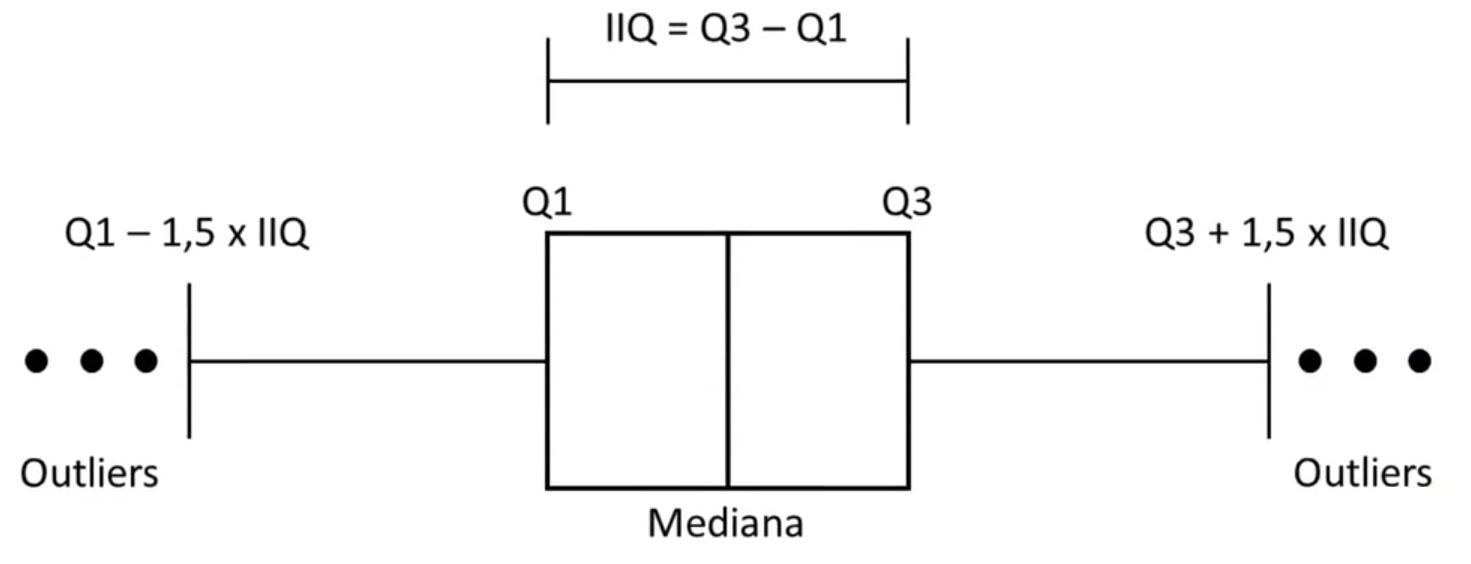

In [103]:
df_sem_nulos.describe()

,cliente.idoso,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
count,7006.000000,7006.000000,7006.000000,7006.000000
mean,0.162004,33.286183,64.720361,2317.743862
std,0.368481,35.311206,30.084664,2876.919022
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.450000,402.087500
50%,0.000000,29.000000,70.300000,1392.925000
75%,0.000000,56.000000,89.850000,3783.600000
max,1.000000,1080.000000,118.750000,112212.000000


In [104]:
import seaborn as sns

<Axes: xlabel='cliente.tempo_servico'>

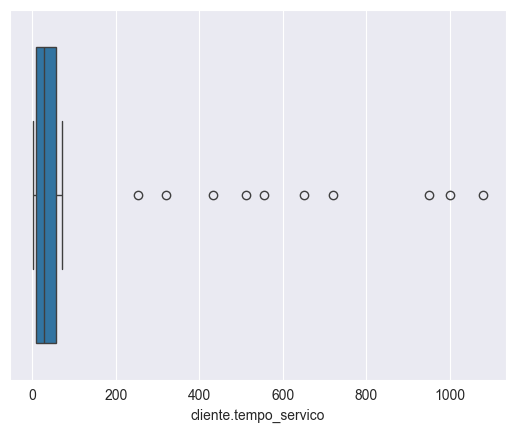

In [105]:
sns.boxplot(x=df_sem_nulos['cliente.tempo_servico'])

In [106]:
q1 = df_sem_nulos['cliente.tempo_servico'].quantile(.25)
q3 = df_sem_nulos['cliente.tempo_servico'].quantile(.75)
iqr = q3-q1
lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr

In [107]:
outliers_index = (df_sem_nulos['cliente.tempo_servico'] < lim_inferior) | (df_sem_nulos['cliente.tempo_servico'] > lim_superior)

In [108]:
df_sem_nulos[outliers_index]

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
1945,2830-LEWOA,nao,masculino,0,sim,sim,1080.0,sim,nao,fibra otica,...,sim,sim,sim,sim,sim,um ano,nao,cartao de credito (automatico),103.90,112212.00
1946,2831-EBWRN,nao,masculino,0,nao,nao,1000.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,sim,cheque eletronico,45.90,45900.00
1952,2834-SPCJV,sim,masculino,0,sim,nao,950.0,sim,nao,fibra otica,...,nao,nao,nao,sim,nao,mes a mes,nao,cheque eletronico,84.10,79895.00
1956,2842-JTCCU,sim,masculino,0,nao,nao,254.0,sim,nao,DSL,...,nao,nao,nao,nao,nao,mes a mes,nao,transferencia bancaria (automatica),46.05,80.35
1958,2845-AFFTX,sim,masculino,1,sim,nao,321.0,sim,sim,fibra otica,...,nao,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,99.80,4259.30
1963,2851-STERV,nao,masculino,1,nao,nao,650.0,sim,nao,DSL,...,nao,sim,sim,sim,sim,um ano,sim,cheque eletronico,73.00,47450.00
1966,2856-NNASM,sim,masculino,1,nao,nao,721.0,sim,nao,fibra otica,...,nao,nao,nao,sim,sim,mes a mes,sim,cheque pelo correio,89.55,3856.75
1970,2862-JVEOY,nao,masculino,0,nao,nao,555.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,um ano,nao,cheque pelo correio,19.15,124.40
1973,2865-TCHJW,sim,feminino,1,nao,nao,433.0,sim,sim,fibra otica,...,nao,sim,nao,sim,nao,mes a mes,sim,cheque eletronico,89.20,346.20
1974,2866-IKBTM,nao,feminino,0,nao,nao,512.0,sim,nao,nao,...,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,sem servico de internet,mes a mes,nao,cheque pelo correio,19.55,19.55


<h1>Substituindo valores para os outliers</h1>

In [109]:
df_sem_out = df_sem_nulos.copy()

In [110]:
df_sem_out.loc[outliers_index, 'cliente.tempo_servico'] = np.ceil(
    df_sem_out.loc[outliers_index, 'conta.cobranca.Total'] / df_sem_out.loc[outliers_index, 'conta.cobranca.mensal']
)

<Axes: xlabel='cliente.tempo_servico'>

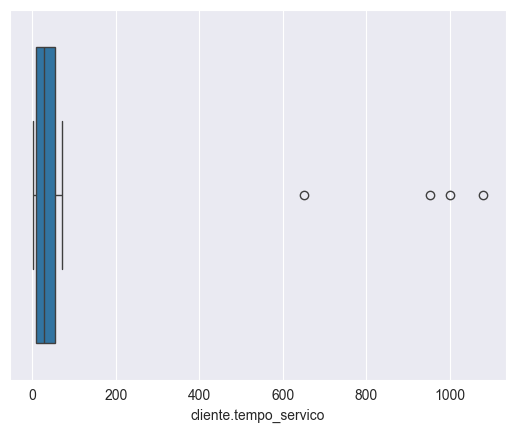

In [111]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

In [112]:
df_sem_out[outliers_index][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.90,112212.00
1946,1000.0,45.90,45900.00
1952,951.0,84.10,79895.00
1956,2.0,46.05,80.35
1958,43.0,99.80,4259.30
1963,650.0,73.00,47450.00
1966,44.0,89.55,3856.75
1970,7.0,19.15,124.40
1973,4.0,89.20,346.20
1974,1.0,19.55,19.55


In [113]:
q1 = df_sem_out['cliente.tempo_servico'].quantile(.25)
q3 = df_sem_out['cliente.tempo_servico'].quantile(.75)
iqr = q3-q1
lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr

outliers_index = (df_sem_out['cliente.tempo_servico'] < lim_inferior) | (df_sem_out['cliente.tempo_servico'] > lim_superior)

df_sem_out[outliers_index][['cliente.tempo_servico', 'conta.cobranca.mensal', 'conta.cobranca.Total']]

,cliente.tempo_servico,conta.cobranca.mensal,conta.cobranca.Total
1945,1080.0,103.9,112212.0
1946,1000.0,45.9,45900.0
1952,951.0,84.1,79895.0
1963,650.0,73.0,47450.0


In [114]:
df_sem_out = df_sem_out[~outliers_index]
df_sem_out

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
7002,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
7003,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7004,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [115]:
df_sem_out.reset_index(drop=True, inplace=True)
df_sem_out

,id_cliente,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,...,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0003-MKNFE,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,...,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,0004-TLHLJ,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,...,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,0011-IGKFF,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,...,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,0013-EXCHZ,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,...,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,0013-MHZWF,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,...,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,9987-LUTYD,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,...,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,9992-RRAMN,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,...,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,9992-UJOEL,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,...,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,9993-LHIEB,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,...,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


<Axes: xlabel='cliente.tempo_servico'>

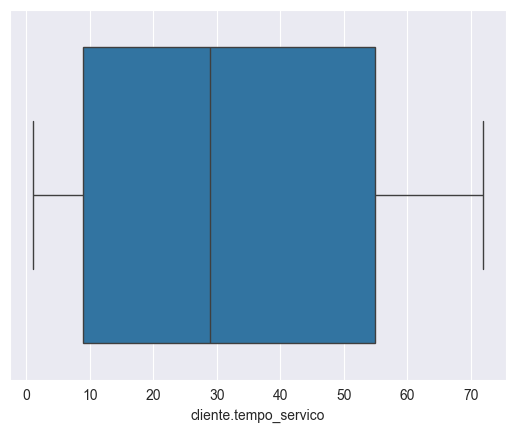

In [116]:
sns.boxplot(x=df_sem_out['cliente.tempo_servico'])

<h2>Trabalhando com variaveis categoricas</h2>

In [117]:
df_sem_id = df_sem_out.drop('id_cliente', axis=1).copy()
df_sem_id

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,nao,masculino,0,nao,nao,9.0,sim,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,nao,cheque pelo correio,59.90,542.40
1,sim,masculino,0,nao,nao,4.0,sim,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,sim,cheque eletronico,73.90,280.85
2,sim,masculino,1,sim,nao,13.0,sim,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,sim,cheque eletronico,98.00,1237.85
3,sim,feminino,1,sim,nao,3.0,sim,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,sim,cheque pelo correio,83.90,267.40
4,nao,feminino,0,nao,sim,9.0,sim,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,sim,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,nao,feminino,0,nao,nao,13.0,sim,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,nao,cheque pelo correio,55.15,742.90
6998,sim,masculino,0,sim,nao,22.0,sim,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,sim,cheque eletronico,85.10,1873.70
6999,nao,masculino,0,nao,nao,2.0,sim,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,sim,cheque pelo correio,50.30,92.75
7000,nao,masculino,0,sim,sim,67.0,sim,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,nao,cheque pelo correio,67.85,4627.65


In [118]:
mapeamento = {
    'nao': 0,
    'sim': 1,
    'masculino': 0,
    'feminino': 1
}

In [119]:
for col in df_sem_id.columns:
    print(f'Coluna: {col}')
    print(df_sem_id[col].unique())
    print("-"*30)

Coluna: Churn
['nao' 'sim']
------------------------------
Coluna: cliente.genero
['masculino' 'feminino']
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
['nao' 'sim']
------------------------------
Coluna: cliente.dependentes
['nao' 'sim']
------------------------------
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone.servico_telefone
['sim' 'nao']
------------------------------
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet.seguranca_onlin

In [120]:
colunas = ['telefone.servico_telefone', 'Churn', 'cliente.parceiro', 'cliente.dependentes', 'conta.faturamente_eletronico', 'cliente.genero']

In [122]:
df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)
df_sem_id

C:\Users\lucas\AppData\Local\Temp\ipykernel_21292\2662226716.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sem_id[colunas] = df_sem_id[colunas].replace(mapeamento)


,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,telefone.varias_linhas,internet.servico_internet,internet.seguranca_online,internet.backup_online,internet.protecao_dispositivo,internet.suporte_tecnico,internet.tv_streaming,internet.filmes_streaming,conta.contrato,conta.faturamente_eletronico,conta.metodo_pagamento,conta.cobranca.mensal,conta.cobranca.Total
0,0,0,0,0,0,9.0,1,sim,DSL,nao,nao,nao,nao,nao,sim,mes a mes,0,cheque pelo correio,59.90,542.40
1,1,0,0,0,0,4.0,1,nao,fibra otica,nao,nao,sim,nao,nao,nao,mes a mes,1,cheque eletronico,73.90,280.85
2,1,0,1,1,0,13.0,1,nao,fibra otica,nao,sim,sim,nao,sim,sim,mes a mes,1,cheque eletronico,98.00,1237.85
3,1,1,1,1,0,3.0,1,nao,fibra otica,nao,nao,nao,sim,sim,nao,mes a mes,1,cheque pelo correio,83.90,267.40
4,0,1,0,0,1,9.0,1,nao,DSL,nao,nao,nao,sim,sim,sim,mes a mes,1,cartao de credito (automatico),69.40,571.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,nao,DSL,sim,nao,nao,sim,nao,nao,um ano,0,cheque pelo correio,55.15,742.90
6998,1,0,0,1,0,22.0,1,sim,fibra otica,nao,nao,nao,nao,nao,sim,mes a mes,1,cheque eletronico,85.10,1873.70
6999,0,0,0,0,0,2.0,1,nao,DSL,nao,sim,nao,nao,nao,nao,mes a mes,1,cheque pelo correio,50.30,92.75
7000,0,0,0,1,1,67.0,1,nao,DSL,sim,nao,sim,sim,nao,sim,dois anos,0,cheque pelo correio,67.85,4627.65


In [123]:
for col in df_sem_id.columns:
    print(f'Coluna: {col}')
    print(df_sem_id[col].unique())
    print("-"*30)

Coluna: Churn
[0 1]
------------------------------
Coluna: cliente.genero
[0 1]
------------------------------
Coluna: cliente.idoso
[0 1]
------------------------------
Coluna: cliente.parceiro
[0 1]
------------------------------
Coluna: cliente.dependentes
[0 1]
------------------------------
Coluna: cliente.tempo_servico
[ 9.  4. 13.  3. 71. 63.  7. 66. 54. 72.  5. 56. 34.  1. 45. 50. 23. 55.
 26. 69. 37. 49. 67. 20. 43. 59. 12. 27.  2. 25. 29. 14. 35. 64. 39. 40.
 11.  6. 30. 70. 57. 58. 16. 32. 33. 10. 21. 61. 15. 44. 22. 24. 19. 47.
 62. 46. 52.  8. 60. 48. 28. 41. 53. 68. 31. 36. 17. 18. 65. 51. 38. 42.]
------------------------------
Coluna: telefone.servico_telefone
[1 0]
------------------------------
Coluna: telefone.varias_linhas
['sim' 'nao' 'sem servico de telefone']
------------------------------
Coluna: internet.servico_internet
['DSL' 'fibra otica' 'nao']
------------------------------
Coluna: internet.seguranca_online
['nao' 'sim' 'sem servico de internet']
---------

<h2>One Hot Encoder (dummy)</h2>

In [127]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [133]:
# pd.get_dummies(s)
pd.get_dummies(s, dtype=int)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [138]:
pd.get_dummies(df_sem_id, dtype=int)

,Churn,cliente.genero,cliente.idoso,cliente.parceiro,cliente.dependentes,cliente.tempo_servico,telefone.servico_telefone,conta.faturamente_eletronico,conta.cobranca.mensal,conta.cobranca.Total,...,internet.filmes_streaming_nao,internet.filmes_streaming_sem servico de internet,internet.filmes_streaming_sim,conta.contrato_dois anos,conta.contrato_mes a mes,conta.contrato_um ano,conta.metodo_pagamento_cartao de credito (automatico),conta.metodo_pagamento_cheque eletronico,conta.metodo_pagamento_cheque pelo correio,conta.metodo_pagamento_transferencia bancaria (automatica)
0,0,0,0,0,0,9.0,1,0,59.90,542.40,...,0,0,1,0,1,0,0,0,1,0
1,1,0,0,0,0,4.0,1,1,73.90,280.85,...,1,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,13.0,1,1,98.00,1237.85,...,0,0,1,0,1,0,0,1,0,0
3,1,1,1,1,0,3.0,1,1,83.90,267.40,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,0,1,9.0,1,1,69.40,571.45,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6997,0,1,0,0,0,13.0,1,0,55.15,742.90,...,1,0,0,0,0,1,0,0,1,0
6998,1,0,0,1,0,22.0,1,1,85.10,1873.70,...,0,0,1,0,1,0,0,1,0,0
6999,0,0,0,0,0,2.0,1,1,50.30,92.75,...,1,0,0,0,1,0,0,0,1,0
7000,0,0,0,1,1,67.0,1,0,67.85,4627.65,...,0,0,1,1,0,0,0,0,1,0


In [147]:
df_dummies = pd.get_dummies(df_sem_id, dtype=int).copy()

In [150]:
df_dummies.columns

Index(['Churn', 'cliente.genero', 'cliente.idoso', 'cliente.parceiro',
       'cliente.dependentes', 'cliente.tempo_servico',
       'telefone.servico_telefone', 'conta.faturamente_eletronico',
       'conta.cobranca.mensal', 'conta.cobranca.Total',
       'telefone.varias_linhas_nao',
       'telefone.varias_linhas_sem servico de telefone',
       'telefone.varias_linhas_sim', 'internet.servico_internet_DSL',
       'internet.servico_internet_fibra otica',
       'internet.servico_internet_nao', 'internet.seguranca_online_nao',
       'internet.seguranca_online_sem servico de internet',
       'internet.seguranca_online_sim', 'internet.backup_online_nao',
       'internet.backup_online_sem servico de internet',
       'internet.backup_online_sim', 'internet.protecao_dispositivo_nao',
       'internet.protecao_dispositivo_sem servico de internet',
       'internet.protecao_dispositivo_sim', 'internet.suporte_tecnico_nao',
       'internet.suporte_tecnico_sem servico de internet',
     

<h2>Todas variaveis agora sao numericas</h2>

In [151]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Churn                                                       7002 non-null   int64  
 1   cliente.genero                                              7002 non-null   int64  
 2   cliente.idoso                                               7002 non-null   int64  
 3   cliente.parceiro                                            7002 non-null   int64  
 4   cliente.dependentes                                         7002 non-null   int64  
 5   cliente.tempo_servico                                       7002 non-null   float64
 6   telefone.servico_telefone                                   7002 non-null   int64  
 7   conta.faturamente_eletronico                                7002 non-null   int64  
 8 